# Commercial models - hyperparameter tuning

In [1]:
from model_builder_new import *
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Set the model CV search conditions
unique_depths = [3, 5, 7]
unique_n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [3]:
# Set up models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
dmr = DummyRegressor(strategy='mean')
random_forest = RandomForestRegressor()
xgb = XGBRegressor()

## Electric heating

In [4]:
predictors, targets, sc, names = get_targets_predictors('heating', 'elec')
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, random_state=0)

elec_heating_use_targets.pkl
elec_heating_all_predictors.pkl
(3556, 295)


### Baseline

In [8]:
# Fit a baseline mean regressor
dmr.fit(X_train, y_train)
preds = dmr.predict(X_test)
print("R^2 score = {}".format(dmr.score(preds, y_test)))

R^2 score = -0.00011137301435693026


### Random forest regressor

In [6]:
# Grid search
gscv_elec_rf = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, random_forest)

In [7]:
# Plot results
plot_gs_results(gscv_elec_rf, unique_depths, unique_n_estimators)

### XGBoost

In [8]:
# Grid search
gscv_elec_xgb = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.418, total=   0.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.489, total=   0.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.565, total=   0.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.386, total=   0.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ....... max_depth=3, n_estimators=200, score=0.577, total=   7.3s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  2.3min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.581, total=   9.2s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  2.5min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.491, total=   7.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.6min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.683, total=   5.8s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min remaining:    0.0s
[CV] max_depth=3, n_estimators=225 ...................................
[CV] ....... max_depth=3, n_estimators=225, score=0.518, total=   6.6s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ....... max_depth=5, n_estimators=125, score=0.487, total=   5.5s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:  5.1min remaining:    0.0s
[CV] max_depth=5, n_estimators=125 ...................................
[CV] ....... max_depth=5, n_estimators=125, score=0.715, total=   5.6s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.2min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.489, total=   6.5s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:  5.3min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.566, total=   6.2s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:  5.5min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.570, total=   6.3s
[Parallel(n_jobs=1)]: Done  78 out of  78

[CV] ....... max_depth=7, n_estimators=100, score=0.525, total=   5.8s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.478, total=   5.7s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.682, total=   5.6s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.479, total=   7.2s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.536, total=   7.0s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.523, total=   7.5s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.477, total=   7.0s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] .

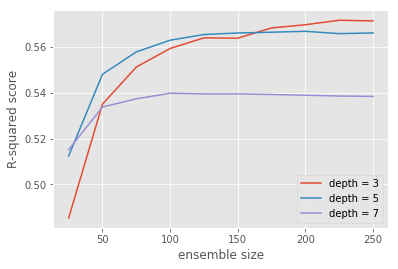

In [9]:
# Plot results
plot_gs_results(gscv_elec_xgb, unique_depths, unique_n_estimators, 'com_heating.png')

## Electric cooling

In [4]:
predictors, targets, sc, names = get_targets_predictors('cooling', 'elec')
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, random_state=1)

### Baseline 

In [5]:
# Fit baseline mean regressor
dmr.fit(X_train, y_train)
preds = dmr.predict(X_test)
print("R^2 score = {}".format(dmr.score(preds, y_test)))

-0.00011137301435693026

### Random forest regressor

In [6]:
# Grid search 
gscv_elec_rf = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, random_forest)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.176, total=   2.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.298, total=   2.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.216, total=   2.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.247, total=   3.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ....... max_depth=3, n_estimators=200, score=0.282, total=  14.4s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  4.7min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.224, total=  13.8s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  5.0min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.250, total=  13.8s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  5.2min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.206, total=  14.1s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.4min remaining:    0.0s
[CV] max_depth=3, n_estimators=225 ...................................
[CV] ....... max_depth=3, n_estimators=225, score=0.168, total=  14.5s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ....... max_depth=5, n_estimators=125, score=0.382, total=  13.7s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 11.5min remaining:    0.0s
[CV] max_depth=5, n_estimators=125 ...................................
[CV] ....... max_depth=5, n_estimators=125, score=0.324, total=  13.2s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 11.7min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.313, total=  16.5s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed: 12.0min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.408, total=  16.6s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed: 12.2min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.348, total=  16.3s
[Parallel(n_jobs=1)]: Done  78 out of  78

KeyboardInterrupt: 

In [ ]:
# Plot results
plot_gs_results(gscv_elec_rf, unique_depths, unique_n_estimators)

### XGBoost

In [6]:
# Grid search 
gscv_elec_xgb = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, xgb)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=75 ....................................
[CV] ........ max_depth=3, n_estimators=75, score=0.524, total=   6.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[CV] max_depth=3, n_estimators=75 ....................................
[CV] ........ max_depth=3, n_estimators=75, score=0.470, total=   6.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=75 ....................................
[CV] ........ max_depth=3, n_estimators=75, score=0.301, total=   6.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=75 ....................................
[CV] ....... max_depth=3, n_estimators=75, score=-0.582, total=   6.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ....... max_depth=3, n_estimators=250, score=0.520, total=  19.5s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  7.9min remaining:    0.0s
[CV] max_depth=3, n_estimators=250 ...................................
[CV] ....... max_depth=3, n_estimators=250, score=0.349, total=  19.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  8.2min remaining:    0.0s
[CV] max_depth=3, n_estimators=250 ...................................
[CV] ...... max_depth=3, n_estimators=250, score=-0.536, total=  19.5s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  8.5min remaining:    0.0s
[CV] max_depth=3, n_estimators=250 ...................................
[CV] ....... max_depth=3, n_estimators=250, score=0.463, total=  20.5s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.9min remaining:    0.0s
[CV] max_depth=5, n_estimators=75 ....................................
[CV] ........ max_depth=5, n_estimators=75, score=0.591, total=   8.4s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ...... max_depth=5, n_estimators=225, score=-0.789, total=  25.7s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 18.6min remaining:    0.0s
[CV] max_depth=5, n_estimators=225 ...................................
[CV] ....... max_depth=5, n_estimators=225, score=0.483, total=  29.4s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 19.1min remaining:    0.0s
[CV] max_depth=5, n_estimators=250 ...................................
[CV] ....... max_depth=5, n_estimators=250, score=0.620, total=  28.2s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed: 19.5min remaining:    0.0s
[CV] max_depth=5, n_estimators=250 ...................................
[CV] ....... max_depth=5, n_estimators=250, score=0.557, total=  32.9s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed: 20.1min remaining:    0.0s
[CV] max_depth=5, n_estimators=250 ...................................
[CV] ....... max_depth=5, n_estimators=250, score=0.359, total=  29.8s
[Parallel(n_jobs=1)]: Done  78 out of  78

[CV] ....... max_depth=7, n_estimators=250, score=0.377, total=  38.3s
[CV] max_depth=7, n_estimators=250 ...................................
[CV] ...... max_depth=7, n_estimators=250, score=-0.940, total=  37.7s
[CV] max_depth=7, n_estimators=250 ...................................
[CV] ....... max_depth=7, n_estimators=250, score=0.502, total=  38.1s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 37.8min finished


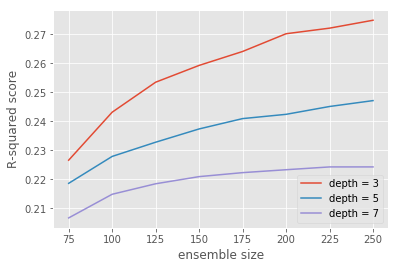

In [7]:
# Plot results
plot_gs_results(gscv_elec_xgb, unique_depths, unique_n_estimators, 'com_cooling.png')